In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

#importing encoders
import glob as glob
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Preparing the data
#exploring the data
#Spliting the data

In [ ]:
#defining the function
def wrangle(filename):
  df = pd.read_csv(filename)

  #subsetting with Apartment, state and price
  mask_apt = df["property_type"] == "apartment"
  mask_state = df["place_with_parent_names"].str.contains("Capital Federal")
  mask_price = df["price_aprox_usd"] < 400000.0

  df = df[mask_apt & mask_state & mask_price]

  #removing outliers
  low,high = df["surface_covered_in_m2"].quantile([0.1,0.9])
  mask_area = df["surface_covered_in_m2"].between(low,high)
  df = df[mask_area]

  #splitting the lat-lon column
  df[["lat","lon"]] = df["lat-lon"].str.split(",", expand = True).astype(float)
  df = df.drop(["lat-lon"],axis=1)

  #extract neighbourhood
  df["neighborhood"] = df["place_with_parent_names"].str.split("|",expand = True)[3]
  df = df.drop(["place_with_parent_names"],axis=1)

  return df

In [ ]:
df = wrangle("/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-real-estate-1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 4 to 8604
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1343 non-null   object 
 1   property_type               1343 non-null   object 
 2   price                       1343 non-null   float64
 3   currency                    1343 non-null   object 
 4   price_aprox_local_currency  1343 non-null   float64
 5   price_aprox_usd             1343 non-null   float64
 6   surface_total_in_m2         965 non-null    float64
 7   surface_covered_in_m2       1343 non-null   float64
 8   price_usd_per_m2            927 non-null    float64
 9   price_per_m2                1343 non-null   float64
 10  floor                       379 non-null    float64
 11  rooms                       1078 non-null   float64
 12  expenses                    349 non-null    object 
 13  properati_url               1343 non-n

In [ ]:
files = glob.glob("/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-real-estate-*.csv")
files

['/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-real-estate-1.csv',
 '/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-real-estate-2.csv',
 '/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-real-estate-3.csv',
 '/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-real-estate-4.csv',
 '/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-real-estate-5.csv']

In [ ]:
#creating a loop with the wrangle function
frames = []
for frame  in files:
  df = wrangle(frame)
  frames.append(df)

df = pd.concat(frames,ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   6582 non-null   object 
 1   property_type               6582 non-null   object 
 2   price                       6582 non-null   float64
 3   currency                    6582 non-null   object 
 4   price_aprox_local_currency  6582 non-null   float64
 5   price_aprox_usd             6582 non-null   float64
 6   surface_total_in_m2         4752 non-null   float64
 7   surface_covered_in_m2       6582 non-null   float64
 8   price_usd_per_m2            4536 non-null   float64
 9   price_per_m2                6582 non-null   float64
 10  floor                       1900 non-null   float64
 11  rooms                       5286 non-null   float64
 12  expenses                    1739 non-null   object 
 13  properati_url               6582 

In [ ]:
len(frames)

5

In [ ]:
df.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,neighborhood
0,sell,apartment,129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...,-34.584651,-58.454693,Chacarita
1,sell,apartment,87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...,-34.638979,-58.500115,Villa Luro
2,sell,apartment,118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...,-34.615847,-58.459957,Caballito
3,sell,apartment,57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...,-34.625222,-58.382382,Constitución
4,sell,apartment,90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...,-34.610610,-58.412511,Once


In [ ]:
#splitting the data
target = "price_aprox_usd"
features = ["neighborhood"]
X_train = df[features]
y_train = df[target]

#creating baseline
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:3]

#baseline MAE
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)
print("Baseline Mean Absolute Error", round(mae_baseline,2))

Baseline Mean Absolute Error 44860.11


In [ ]:
#iterate phase
ohe = OneHotEncoder()
ohe.fit(X_train)

XT_train = ohe.transform(X_train)
print(XT_train.shape)

(6582, 57)


In [ ]:
# Check your work
assert XT_train.shape == (6582, 57), f"`XT_train` is the wrong shape: {XT_train.shape}"

In [ ]:
model = make_pipeline(
    OneHotEncoder(),
    Ridge()
)

model.fit(X_train,y_train)
y_pred_training = model.predict(X_train)

mae_training = mean_absolute_error(y_train, y_pred_training)
round(mae_training,2)

39350.2

In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/Data for WQU/Project 2/buenos-aires-test-features.csv")[features]
X_test.dropna(inplace = True)

In [ ]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

,0
0,246626.761817
1,161356.114767
2,98233.730967
3,110848.623422
4,127777.662728


In [ ]:
#pulling out coefficients and intercept
intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("Intercept",round(intercept,2))

feature_names = model.named_steps["onehotencoder"].get_feature_names_out()
feature_names[:10]

Intercept 118523.28


array(['neighborhood_', 'neighborhood_Abasto', 'neighborhood_Agronomía',
       'neighborhood_Almagro', 'neighborhood_Balvanera',
       'neighborhood_Barracas', 'neighborhood_Barrio Norte',
       'neighborhood_Belgrano', 'neighborhood_Boca', 'neighborhood_Boedo'],
      dtype=object)

In [ ]:
#finding out the feature importance
feat_imp = pd.Series(coefficients,index  = feature_names)
feat_imp.head()

,0
neighborhood_,-19371.226521
neighborhood_Abasto,4332.951255
neighborhood_Agronomía,-780.500258
neighborhood_Almagro,2904.692509
neighborhood_Balvanera,-11171.010820


<Axes: >

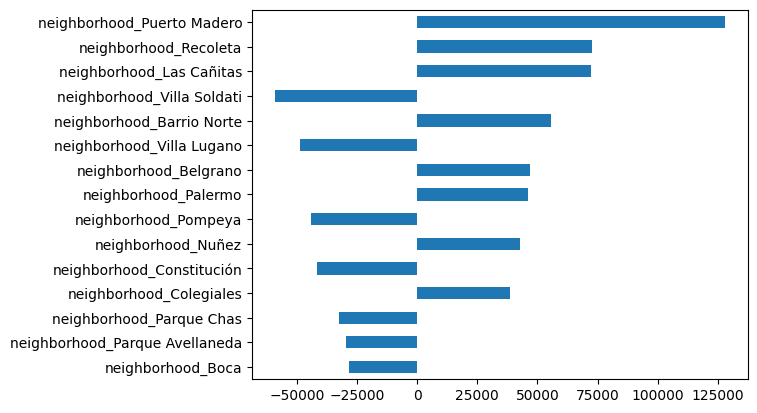

In [ ]:
feat_imp.sort_values(key=abs).tail(15).plot(kind = 'barh')